# Figure 7

Notebook to create plots for figure 7

Taylor diagrams display the performance of published gap-filling techniques andLDEO-HPD product.  Performance is evaluated at two global datasets, LDEO and GLODAP,using data in the from 1990-1999 (1990s), 2000-2009 (2000s), and 2010-2018 (2010s).Red starindicates standard deviation of each dataset

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.print_figure_kwargs = {'dpi':300, 'bbox_inches': 'tight'}

import xarray as xr
import numpy as np
import pandas as pd
import cmocean.cm as cm
import matplotlib 
import glob
#import modin.pandas as pdm
import os
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import AutoMinorLocator
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import skill_metrics as sm

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from plotting_tools.spatial_map import SpatialMap
from plotting_tools.time_series_diagram import TimeSeriesPlot
from plotting_tools.taylor_diagram import TaylorDiagram
from plotting_tools.target_diagram import TargetDiagram
from stats_tools.target_diagram import target_axes

In [2]:
#dir_raw = '/local/data/artemis/workspace/gloege/SOCAT-LE/data/raw'
#dir_clean = '/local/data/artemis/workspace/gloege/SOCAT-LE/data/clean'
dir_figs = '/home/gloege/projects/ldeo_hpd/reports/figures'
dir_tests = '/local/data/artemis/workspace/gloege/data/test_sets'
dir_model = '/local/data/artemis/workspace/gloege/LDEO-FFN/data/HPD_output/XGB'
dir_prods = '/local/data/artemis/observations/pCO2_products/originals'

# Load test set

In [3]:
ds_glodap = xr.open_dataset(f'{dir_tests}/GLODAP_1x1_198201-201812.nc')
ds_ldeo = xr.open_dataset(f'{dir_tests}/LDEO_1x1_198201-201812.nc')

# load products

In [4]:
fl_prod='/local/data/artemis/workspace/gloege/gregor/pco2_products_standardised.nc'
ds_prod = xr.open_dataset(fl_prod)
ds_prod['lon'] = [lon if lon>0 else lon+360 for lon in ds_prod['lon'].values]
ds_prod['time'] = pd.date_range(
    start=f'1985-01-01T00:00:00.000000000', 
    end=f'2018-12-01T00:00:00.000000000',
    freq='MS') + np.timedelta64(14, 'D')
ds_prod = ds_prod.sortby('lon')

# load hpd

In [5]:
%%time
ds_hpd = xr.open_dataset('/local/data/artemis/workspace/gloege/ldeo-hpd/LDEO-HPD_v20210425_1x1_198201-201812.nc')
ds_hpd = ds_hpd.mean('model')

/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


CPU times: user 3.56 s, sys: 5.71 s, total: 9.28 s
Wall time: 9.72 s


In [6]:
ds_hpd = ds_hpd.sel(time=slice('1982-01','2018-12'))

# Target diagram

## bias by decade

['2010-01-01', '2018-12-31']


(275, 500)

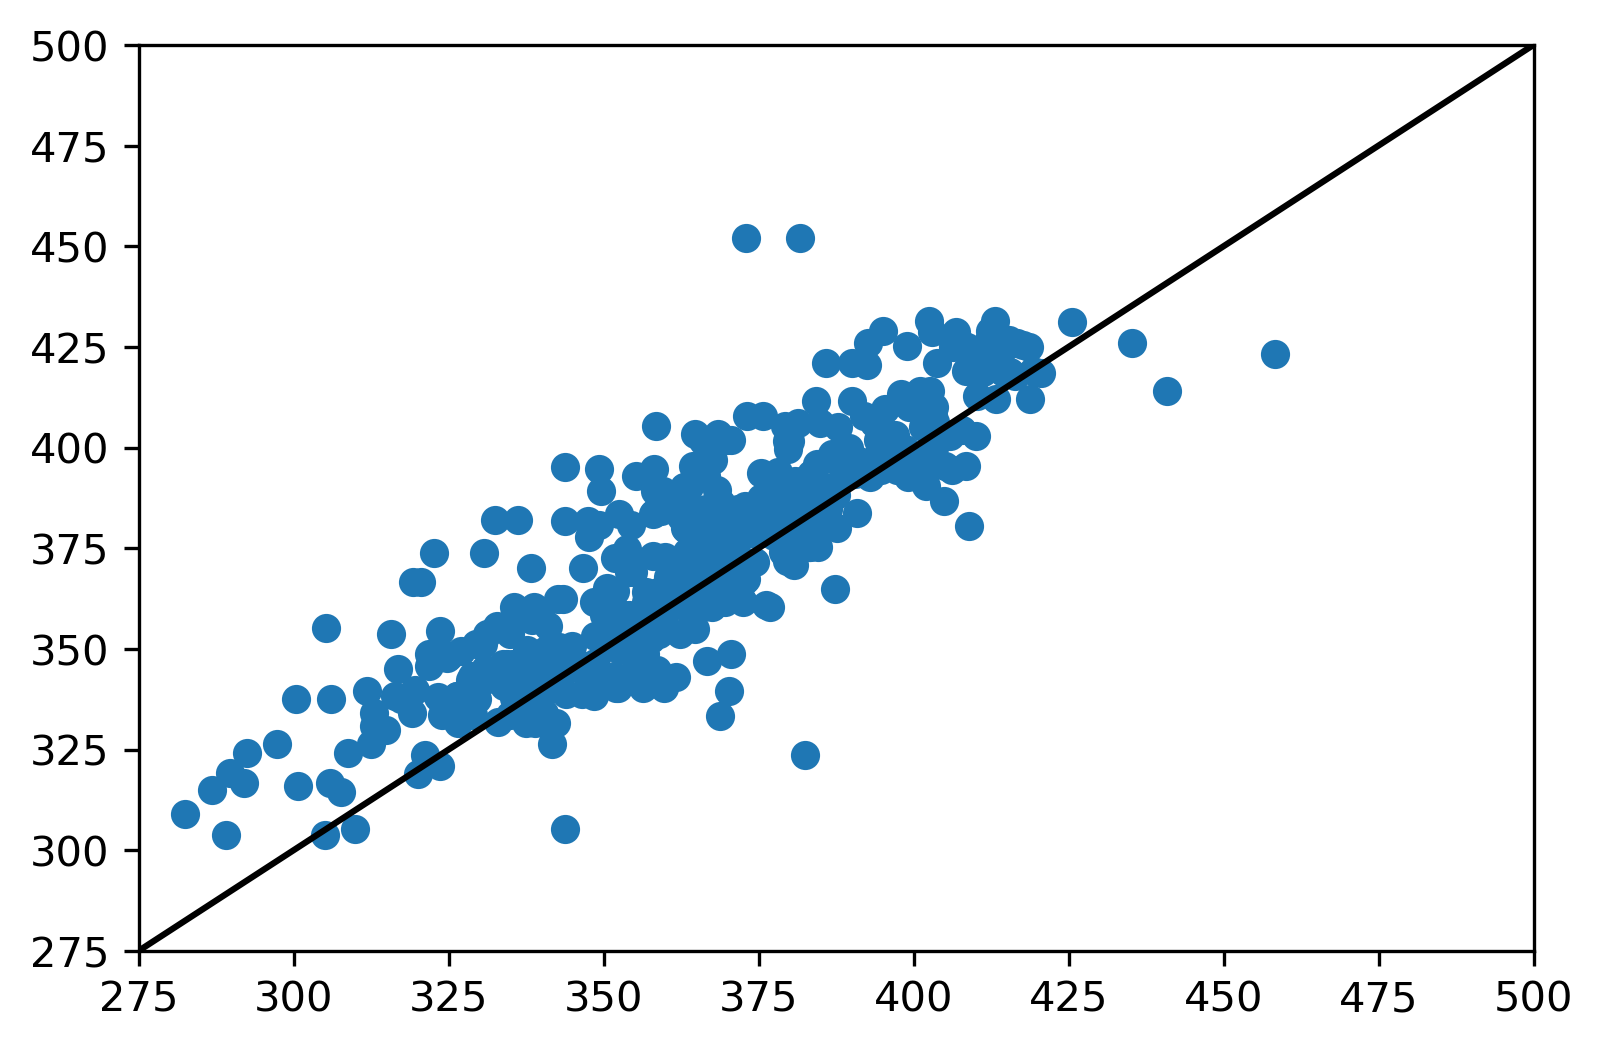

In [133]:

    
dates_list = [['1990-01-01', '1999-12-31'], ['2000-01-01', '2010-12-31'], ['2010-01-01', '2018-12-31']]
dates = dates_list[2]

print(dates)

# data
glodap_tmp = ds_glodap['spco2_mean'].sel(time=slice(dates[0], dates[1]))
ds_hpd_tmp = ds_hpd.sel(time=glodap_tmp.time)
ds_prod_tmp = ds_prod.sel(time=glodap_tmp.time)

(data_somffn, data_carbo, data_lsce, data_csir, data_hpd, data_obs) = xr.align(
    ds_prod_tmp['mpisomffn'],
    ds_prod_tmp['jenamls'],
    ds_prod_tmp['lsceffnn2'],
    ds_prod_tmp['csirml6'],
    ds_hpd_tmp['spco2'],
    glodap_tmp,)

plt.scatter(data_obs,data_carbo)
plt.plot([275,500],[275,500],'k')
plt.xlim([275,500])
plt.ylim([275,500])

['2010-01-01', '2018-12-31']


(275, 500)

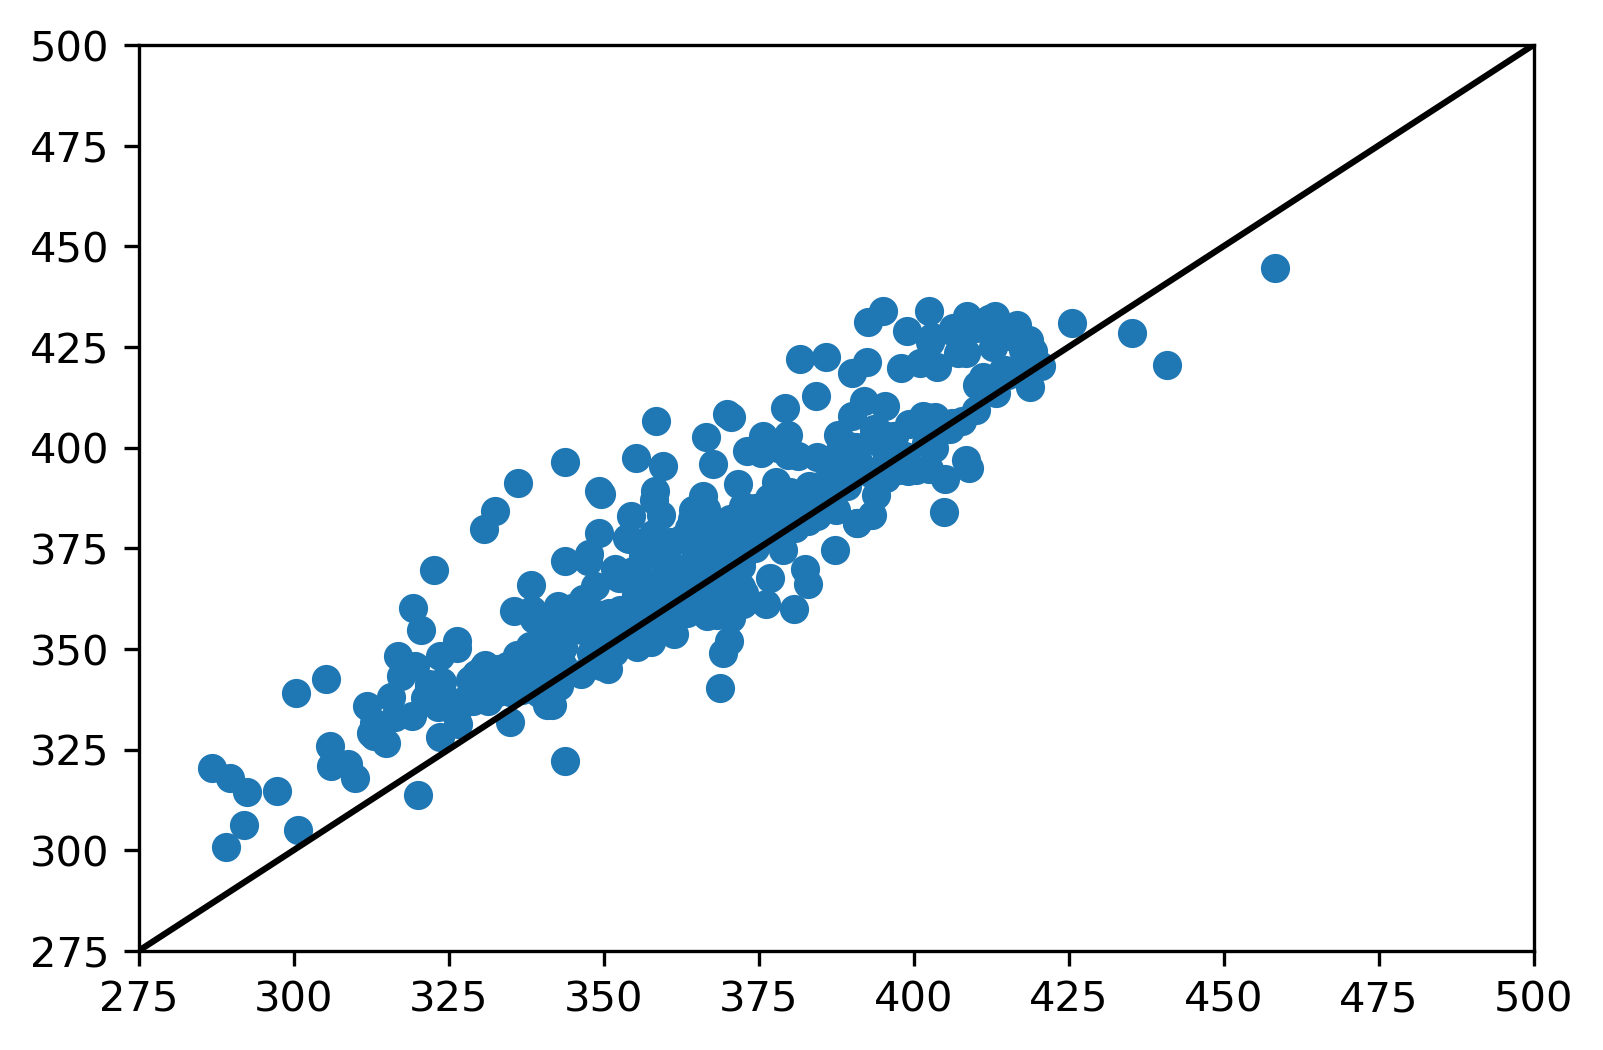

In [134]:

    
dates_list = [['1990-01-01', '1999-12-31'], ['2000-01-01', '2010-12-31'], ['2010-01-01', '2018-12-31']]
dates = dates_list[2]

print(dates)

# data
glodap_tmp = ds_glodap['spco2_mean'].sel(time=slice(dates[0], dates[1]))
ds_hpd_tmp = ds_hpd.sel(time=glodap_tmp.time)
ds_prod_tmp = ds_prod.sel(time=glodap_tmp.time)

(data_somffn, data_carbo, data_lsce, data_csir, data_hpd, data_obs) = xr.align(
    ds_prod_tmp['mpisomffn'],
    ds_prod_tmp['jenamls'],
    ds_prod_tmp['lsceffnn2'],
    ds_prod_tmp['csirml6'],
    ds_hpd_tmp['spco2'],
    glodap_tmp,)

plt.scatter(data_obs,data_hpd)
plt.plot([275,500],[275,500],'k')
plt.xlim([275,500])
plt.ylim([275,500])

In [101]:
# GLODAP data
ds_glodap = xr.open_dataset(f'{dir_tests}/GLODAP_1x1_198201-201812.nc').load()
ds_glodap = ds_glodap.where(ds_glodap>275)
ds_glodap = ds_glodap.where(ds_glodap<500)

In [124]:
def bias(ds):
    return (ds.mean()-data_obs.mean()).values

    
dates_list = [['1990-01-01', '1999-12-31'], ['2000-01-01', '2010-12-31'], ['2010-01-01', '2018-12-31']]

for dates in dates_list:
    print(dates)
    # data
    glodap_tmp = ds_glodap['spco2_mean'].sel(time=slice(dates[0], dates[1]))
    ds_hpd_tmp = ds_hpd.sel(time=glodap_tmp.time)
    ds_prod_tmp = ds_prod.sel(time=glodap_tmp.time)

    (data_somffn, data_carbo, data_lsce, data_csir, data_hpd, data_obs) = xr.align(
        ds_prod_tmp['mpisomffn'],
        ds_prod_tmp['jenamls'],
        ds_prod_tmp['lsceffnn2'],
        ds_prod_tmp['csirml6'],
        ds_hpd_tmp['spco2'],
        glodap_tmp,)
    print('HPD')
    print(f'{bias(data_hpd):0.4}')

    print('SOMFFN')
    print(f'{bias(data_somffn):0.4}')

    print('MLS')
    print(f'{bias(data_carbo.where((data_carbo>0))):0.4}')

    print('CMEMS')
    print(f'{bias(data_lsce):0.4}')

    print('CSIR')
    print(f'{bias(data_csir):0.4}')

    #print('hpd')
    #print(rmse(ds_hpd_tmp['spco2']))

    #for prod in list(ds_prod_tmp):
    #    print(prod)
    #    print(rmse(ds_prod_tmp[prod]))
    print('')

['1990-01-01', '1999-12-31']
HPD
3.183
SOMFFN
3.972
MLS
-1.922
CMEMS
4.541
CSIR
3.529

['2000-01-01', '2010-12-31']
HPD
4.826
SOMFFN
4.438
MLS
-2.637
CMEMS
5.793
CSIR
4.044

['2010-01-01', '2018-12-31']
HPD
15.84
SOMFFN
14.68
MLS
5.398
CMEMS
16.59
CSIR
14.26



## GLODAP by decade

In [30]:
%%time
# GLODAP data
ds_glodap = xr.open_dataset(f'{dir_tests}/GLODAP_1x1_198201-201812.nc').load()
ds_glodap = ds_glodap.where(ds_glodap>275)
ds_glodap = ds_glodap.where(ds_glodap<500)

# choose decade 
#dates = ['1990-01-01', '1999-12-31']
dates = ['2000-01-01', '2009-12-31']
#dates = ['2010-01-01', '2018-12-31']

# sample data by decade
ds_hpd_tmp = ds_hpd.sel(time=slice(dates[0], dates[1]))
ds_prod_tmp = ds_prod.sel(time=slice(dates[0], dates[1]))
ds_glodap_tmp = ds_glodap.sel(time=slice(dates[0], dates[1]))

# get data for taylor diagram
(data_somffn, data_carbo, data_lsce, data_csir, data_hpd, data_obs) = xr.align(
    ds_prod_tmp['mpisomffn'],
    ds_prod_tmp['jenamls'],
    ds_prod_tmp['lsceffnn2'],
    ds_prod_tmp['csirml6'],
    ds_hpd_tmp['spco2'],
    ds_glodap_tmp['spco2_mean'].load(),)

data = {'somffn': list(data_somffn.values.flatten()), 
        'carbo': list(data_carbo.values.flatten()), 
        'lsce': list(data_lsce.values.flatten()), 
        'csir': list(data_csir.values.flatten()), 
        'hpd': list(data_hpd.values.flatten()), 
        'OBS': list(data_obs.values.flatten())}

## Dataframe
df = pd.DataFrame(data)
df = df.dropna()

obs='OBS'
stats_somffn = sm.taylor_statistics(df['somffn'].values,df[obs].values,'data')
stats_lsce = sm.taylor_statistics(df['lsce'].values,df[obs].values,'data')
stats_carbo = sm.taylor_statistics(df['carbo'].values,df[obs].values,'data') # was added
stats_csir = sm.taylor_statistics(df['csir'].values,df[obs].values,'data') # was added
stats_hpd = sm.taylor_statistics(df['hpd'].values,df[obs].values,'data') # was added

# Reference std
stdref = stats_somffn['sdev'][0]

# Samples std,rho,name
samples = [
    [stats_somffn['sdev'][1], stats_somffn['ccoef'][1], "SOM-FFN",'k','o'],
    [stats_lsce['sdev'][1], stats_lsce['ccoef'][1], "FFNN-LSCE",'g','o'],
    [stats_carbo['sdev'][1], stats_carbo['ccoef'][1], "JenaMLS",'c','o'],
    [stats_csir['sdev'][1], stats_csir['ccoef'][1], "CSIRML6",'r','o'],
    [stats_hpd['sdev'][1], stats_hpd['ccoef'][1], "GLODAP",'b','o'],]

CPU times: user 8.89 s, sys: 4.43 s, total: 13.3 s
Wall time: 13.3 s


## Plot data

CPU times: user 2.09 s, sys: 796 ms, total: 2.89 s
Wall time: 2.3 s


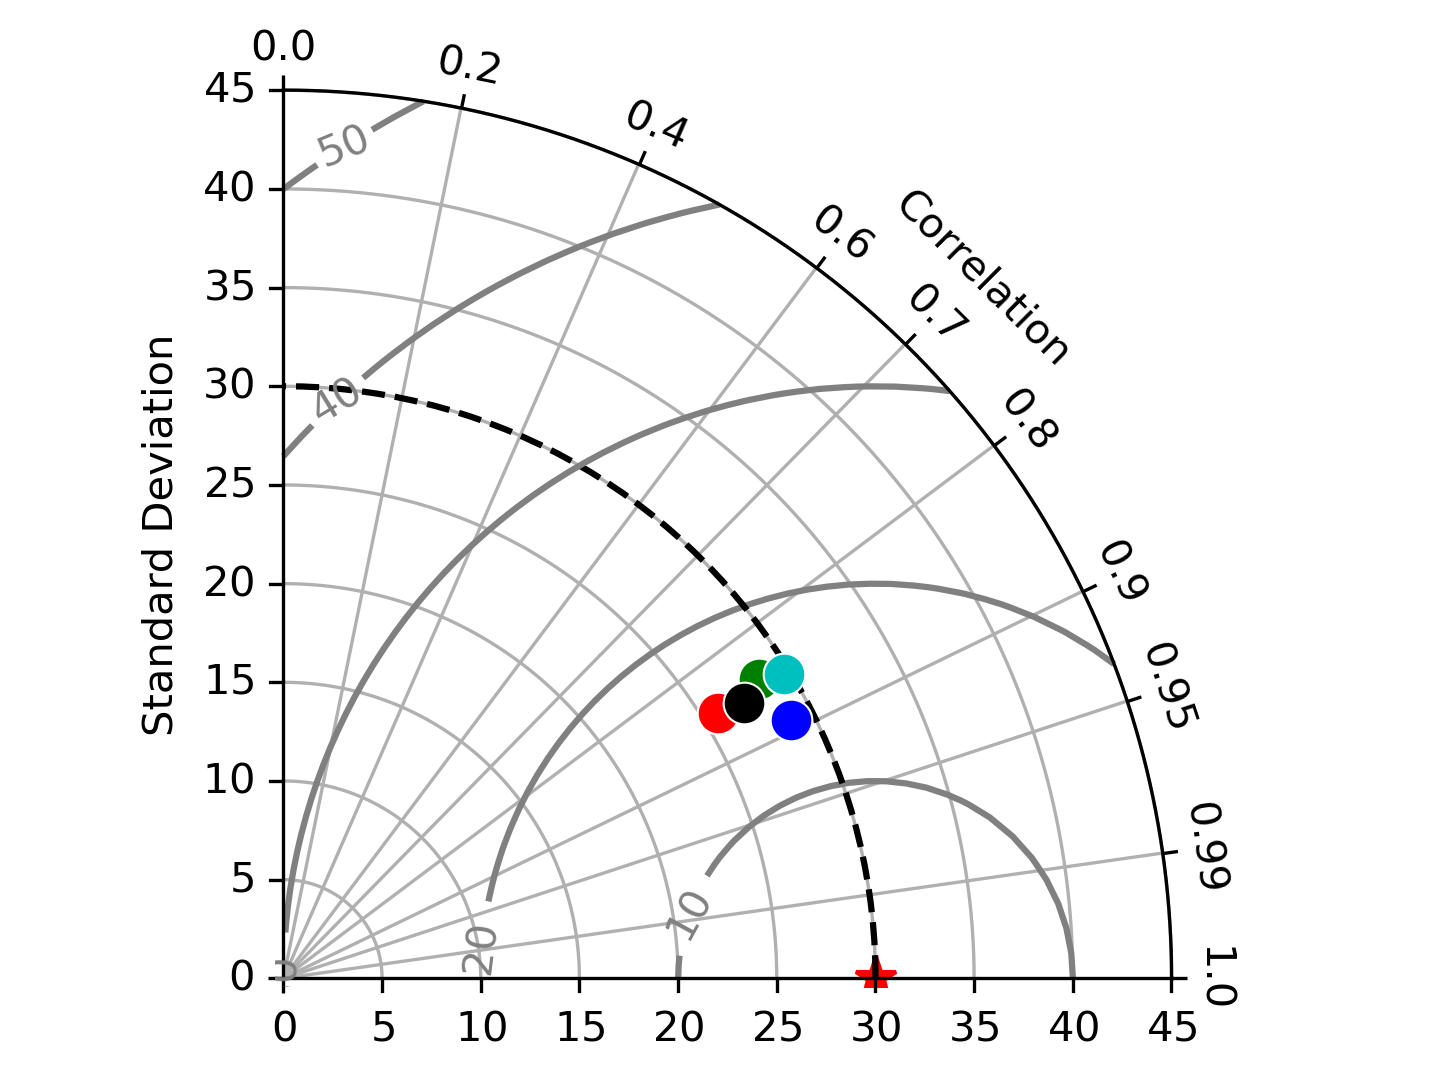

In [31]:
%%time
fig = plt.figure()

dia = TaylorDiagram(stdref, fig=fig, label='Reference', extend=False)
dia.samplePoints[0].set_color('r')  # Mark reference point as a red star

# Remove bottom label
dia._ax.axis["left"].label.set_text("")

# Add label to left
dia._ax.axis["right"].toggle(label=True)
dia._ax.axis["right"].label.set_text("Standard Deviation")

# Add models to Taylor diagram
for i, (stddev, corrcoef, name, col, marker) in enumerate(samples):
    dia.add_sample(stddev, corrcoef,
                   marker=marker, ms=10, ls='',
                   mfc=col, mec='white', mew=0.5,
                   label=name)

# Add RMS contours, and label them
contours = dia.add_contours(levels=5, colors='0.5')  # 5 levels in grey
plt.clabel(contours, inline=1, fontsize=10, fmt='%.0f')

dia.add_grid()                                  # Add grid
dia._ax.axis[:].major_ticks.set_tick_out(True)  # Put ticks outward

plt.savefig(f'{dir_figs}/taylor_diagram_glodap_2000_latest.pdf', 
                transparent = True, 
                bbox_inches = 'tight', 
                pad_inches = 0)

### BIAS

In [16]:
#1990s
for prod in df.columns:
    print(prod)
    print(df[prod].mean()-df['OBS'].mean())

somffn
5.2774154926157735
carbo
5.833731129375394
lsce
4.185196644192558
csir
4.050359318952474
hpd
5.459476945535471
OBS
0.0


In [21]:
#2000s
for prod in df.columns:
    print(prod)
    print(df[prod].mean()-df['OBS'].mean())

somffn
-1.210281296061396
carbo
-1.197729360648168
lsce
0.45889217396495496
csir
-1.7329497269441276
hpd
-1.2893059682112948
OBS
0.0


In [27]:
#2010s
for prod in df.columns:
    print(prod)
    print(df[prod].mean()-df['OBS'].mean())

somffn
6.433908623183754
carbo
9.075003764614621
lsce
5.976194177798391
csir
6.90313459542233
hpd
9.003833859837869
OBS
0.0


### RMSE

In [17]:
# 1990s
def rmse(prod):
    return np.sqrt(((df[prod]-df['OBS'])**2).mean())

for prod in df.columns:
    print(prod)
    print(rmse(prod))

somffn
23.319179312197832
carbo
22.211660208639028
lsce
21.841626519431845
csir
20.77383951793181
hpd
22.01110941191781
OBS
0.0


In [22]:
# 2000s
def rmse(prod):
    return np.sqrt(((df[prod]-df['OBS'])**2).mean())

for prod in df.columns:
    print(prod)
    print(rmse(prod))

somffn
15.527728619648537
carbo
16.15489581410811
lsce
16.28436774122329
csir
15.761434131924297
hpd
13.848743035700167
OBS
0.0


In [28]:
# 2010s
def rmse(prod):
    return np.sqrt(((df[prod]-df['OBS'])**2).mean())

for prod in df.columns:
    print(prod)
    print(rmse(prod))

somffn
16.87312913730216
carbo
17.677604747027722
lsce
15.911357151105767
csir
15.718642212459608
hpd
15.396200704579737
OBS
0.0


### AAE

In [18]:
# 1990
def aae(prod):
    return np.abs(df[prod]-df['OBS']).mean()

for prod in df.columns:
    print(prod)
    print(aae(prod))

somffn
16.398371616949813
carbo
16.247618021985776
lsce
15.848748617893456
csir
15.086821928171593
hpd
15.528556983712027
OBS
0.0


In [23]:
# 2000
def aae(prod):
    return np.abs(df[prod]-df['OBS']).mean()

for prod in df.columns:
    print(prod)
    print(aae(prod))

somffn
12.007731535139328
carbo
12.069840743259656
lsce
12.14479910173306
csir
12.08522473914722
hpd
10.555850822560297
OBS
0.0


In [29]:
# 2010
def aae(prod):
    return np.abs(df[prod]-df['OBS']).mean()

for prod in df.columns:
    print(prod)
    print(aae(prod))

somffn
12.997914936596572
carbo
13.015696881693819
lsce
11.785772244446475
csir
12.03070254538141
hpd
11.492250189875492
OBS
0.0


# LDEO

In [8]:
ldeo = ds_ldeo['spco2_mean'].load()
ldeo = ldeo.where(ldeo<500)
ldeo = ldeo.where(ldeo>200)

## LDEO decadeal RMSE

<xarray.DataArray 'spco2' ()>
array(103.02418754)

In [92]:

def rmse(ds):
    return np.sqrt(((ds-data_obs)**2).mean()).values

dates_list = [['1990-01-01', '1999-12-31'], ['2000-01-01', '2010-12-31'], ['2010-01-01', '2018-12-31']]

for dates in dates_list:
    print(dates)
    # data
    ldeo_tmp = ldeo.sel(time=slice(dates[0], dates[1]))
    ds_hpd_tmp = ds_hpd.sel(time=ldeo_tmp.time)
    ds_prod_tmp = ds_prod.sel(time=ldeo_tmp.time)

    (data_somffn, data_carbo, data_lsce, data_csir, data_hpd, data_obs) = xr.align(
        ds_prod_tmp['mpisomffn'],
        ds_prod_tmp['jenamls'],
        ds_prod_tmp['lsceffnn2'],
        ds_prod_tmp['csirml6'],
        ds_hpd_tmp['spco2'],
        ldeo_tmp,)

    print('HPD')
    print(f'{rmse(data_hpd):0.3}')

    print('SOMFFN')
    print(f'{rmse(data_somffn):0.3}')

    print('MLS')
    print(f'{rmse(data_carbo.where((data_carbo>0) & (data_carbo<1000))):0.3}')

    print('CMEMS')
    print(f'{rmse(data_lsce):0.3}')

    print('CSIR')
    print(f'{rmse(data_csir):0.3}')

    #print('hpd')
    #print(rmse(ds_hpd_tmp['spco2']))

    #for prod in list(ds_prod_tmp):
    #    print(prod)
    #    print(rmse(ds_prod_tmp[prod]))
    print('')
    

['1990-01-01', '1999-12-31']
HPD
27.6
SOMFFN
28.2
MLS
32.5
CMEMS
25.8
CSIR
28.4

['2000-01-01', '2010-12-31']
HPD
19.0
SOMFFN
19.9
MLS
25.3
CMEMS
18.6
CSIR
21.2

['2010-01-01', '2018-12-31']
HPD
23.4
SOMFFN
26.0
MLS
29.8
CMEMS
24.8
CSIR
27.9



In [100]:
def bias(ds):
    return (ds.mean()-data_obs.mean()).values

    
dates_list = [['1990-01-01', '1999-12-31'], ['2000-01-01', '2010-12-31'], ['2010-01-01', '2018-12-31']]

for dates in dates_list:
    print(dates)
    # data
    ldeo_tmp = ldeo.sel(time=slice(dates[0], dates[1]))
    ds_hpd_tmp = ds_hpd.sel(time=ldeo_tmp.time)
    ds_prod_tmp = ds_prod.sel(time=ldeo_tmp.time)

    (data_somffn, data_carbo, data_lsce, data_csir, data_hpd, data_obs) = xr.align(
        ds_prod_tmp['mpisomffn'],
        ds_prod_tmp['jenamls'],
        ds_prod_tmp['lsceffnn2'],
        ds_prod_tmp['csirml6'],
        ds_hpd_tmp['spco2'],
        ldeo_tmp,)
    print('HPD')
    print(f'{bias(data_hpd):0.4}')

    print('SOMFFN')
    print(f'{bias(data_somffn):0.4}')

    print('MLS')
    print(f'{bias(data_carbo.where((data_carbo>0))):0.4}')

    print('CMEMS')
    print(f'{bias(data_lsce):0.4}')

    print('CSIR')
    print(f'{bias(data_csir):0.4}')

    #print('hpd')
    #print(rmse(ds_hpd_tmp['spco2']))

    #for prod in list(ds_prod_tmp):
    #    print(prod)
    #    print(rmse(ds_prod_tmp[prod]))
    print('')
    

['1990-01-01', '1999-12-31']
HPD
-0.1302
SOMFFN
0.659
MLS
-5.235
CMEMS
1.228
CSIR
0.2157

['2000-01-01', '2010-12-31']
HPD
1.676
SOMFFN
1.287
MLS
-5.787
CMEMS
2.643
CSIR
0.8934

['2010-01-01', '2018-12-31']
HPD
15.16
SOMFFN
13.96
MLS
4.851
CMEMS
16.09
CSIR
13.69



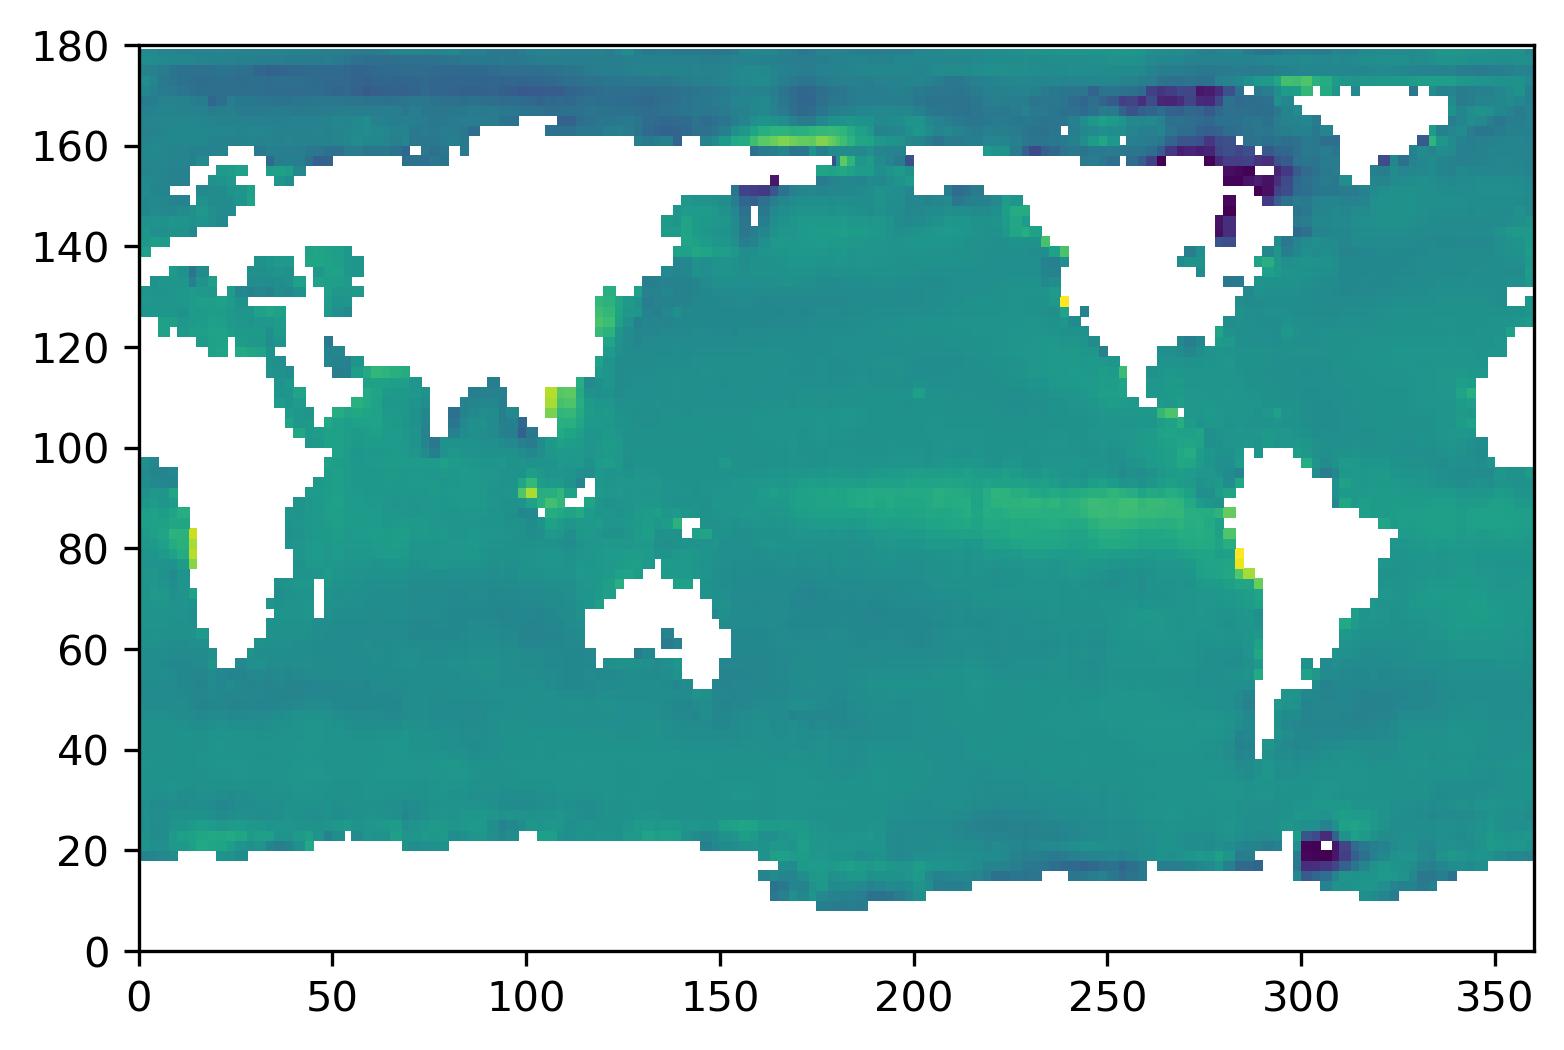

In [95]:
plt.pcolor(data_carbo.where((data_carbo>0) & (data_carbo<1000)).mean('time'))

In [56]:
data_obs.mean()

<xarray.DataArray 'spco2_mean' ()>
array(363.89266796)

<xarray.DataArray 'spco2' ()>
array(839.48206011)

In [63]:
data_carbo.max()

<xarray.DataArray 'jenamls' ()>
array(1347.63256836)

In [33]:
def rmse(ds):
    return np.sqrt(((ds-ldeo_tmp)**2).mean()).values

print('hpd')
print(rmse(ds_hpd_tmp['spco2']))

for prod in list(ds_prod_tmp):
    print(prod)
    print(rmse(ds_prod_tmp[prod]))

hpd
23.449846843257646
mpisomffn
26.021630947818227
jmamlr
25.921171353846596
jenamls
31.583471310288253
lsceffnn2
24.82552622730315
niesfnn
34.82941898824076
csirml6
27.937865029600495


### Original

In [45]:
%%time
#dates = ['1990-01-01', '1999-12-31']
#dates = ['2000-01-01', '2010-12-31']
dates = ['2010-01-01', '2018-12-31']

# data
ds_hpd_tmp = ds_hpd.sel(time=slice(dates[0], dates[1]))
ds_prod_tmp = ds_prod.sel(time=slice(dates[0], dates[1]))
ldeo_tmp = ldeo.sel(time=slice(dates[0], dates[1]))

# data for taylor diagram
(data_somffn, data_carbo, data_lsce, data_csir, data_hpd, data_obs) = xr.align(
    ds_prod_tmp['mpisomffn'],
    ds_prod_tmp['jenamls'],
    ds_prod_tmp['lsceffnn2'],
    ds_prod_tmp['csirml6'],
    ds_hpd_tmp['spco2'],
    ldeo_tmp,)

data = {'somffn': list(data_somffn.values.flatten()), 
        'carbo': list(data_carbo.values.flatten()), 
        'lsce': list(data_lsce.values.flatten()), 
        'csir': list(data_csir.values.flatten()), 
        'hpd': list(data_hpd.values.flatten()), 
        'OBS': list(data_obs.values.flatten())}

## Dataframe
df = pd.DataFrame(data)
df = df.dropna()

obs='OBS'
stats_somffn = sm.taylor_statistics(df['somffn'].values,df[obs].values,'data')
stats_lsce = sm.taylor_statistics(df['lsce'].values,df[obs].values,'data')
stats_carbo = sm.taylor_statistics(df['carbo'].values,df[obs].values,'data') # was added
stats_csir = sm.taylor_statistics(df['csir'].values,df[obs].values,'data') # was added
stats_hpd = sm.taylor_statistics(df['hpd'].values,df[obs].values,'data') # was added

# Reference std
stdref = stats_somffn['sdev'][0]

# Samples std,rho,name
samples = [
    [stats_somffn['sdev'][1], stats_somffn['ccoef'][1], "SOM-FFN",'k','o'],
    [stats_lsce['sdev'][1], stats_lsce['ccoef'][1], "FFNN-LSCE",'g','o'],
    [stats_carbo['sdev'][1], stats_carbo['ccoef'][1], "JenaMLS",'c','o'],
    [stats_csir['sdev'][1], stats_csir['ccoef'][1], "CSIRML6",'r','o'],
    [stats_hpd['sdev'][1], stats_hpd['ccoef'][1], "LDEO-HPD",'b','o'],]

CPU times: user 7.23 s, sys: 2.78 s, total: 10 s
Wall time: 10 s


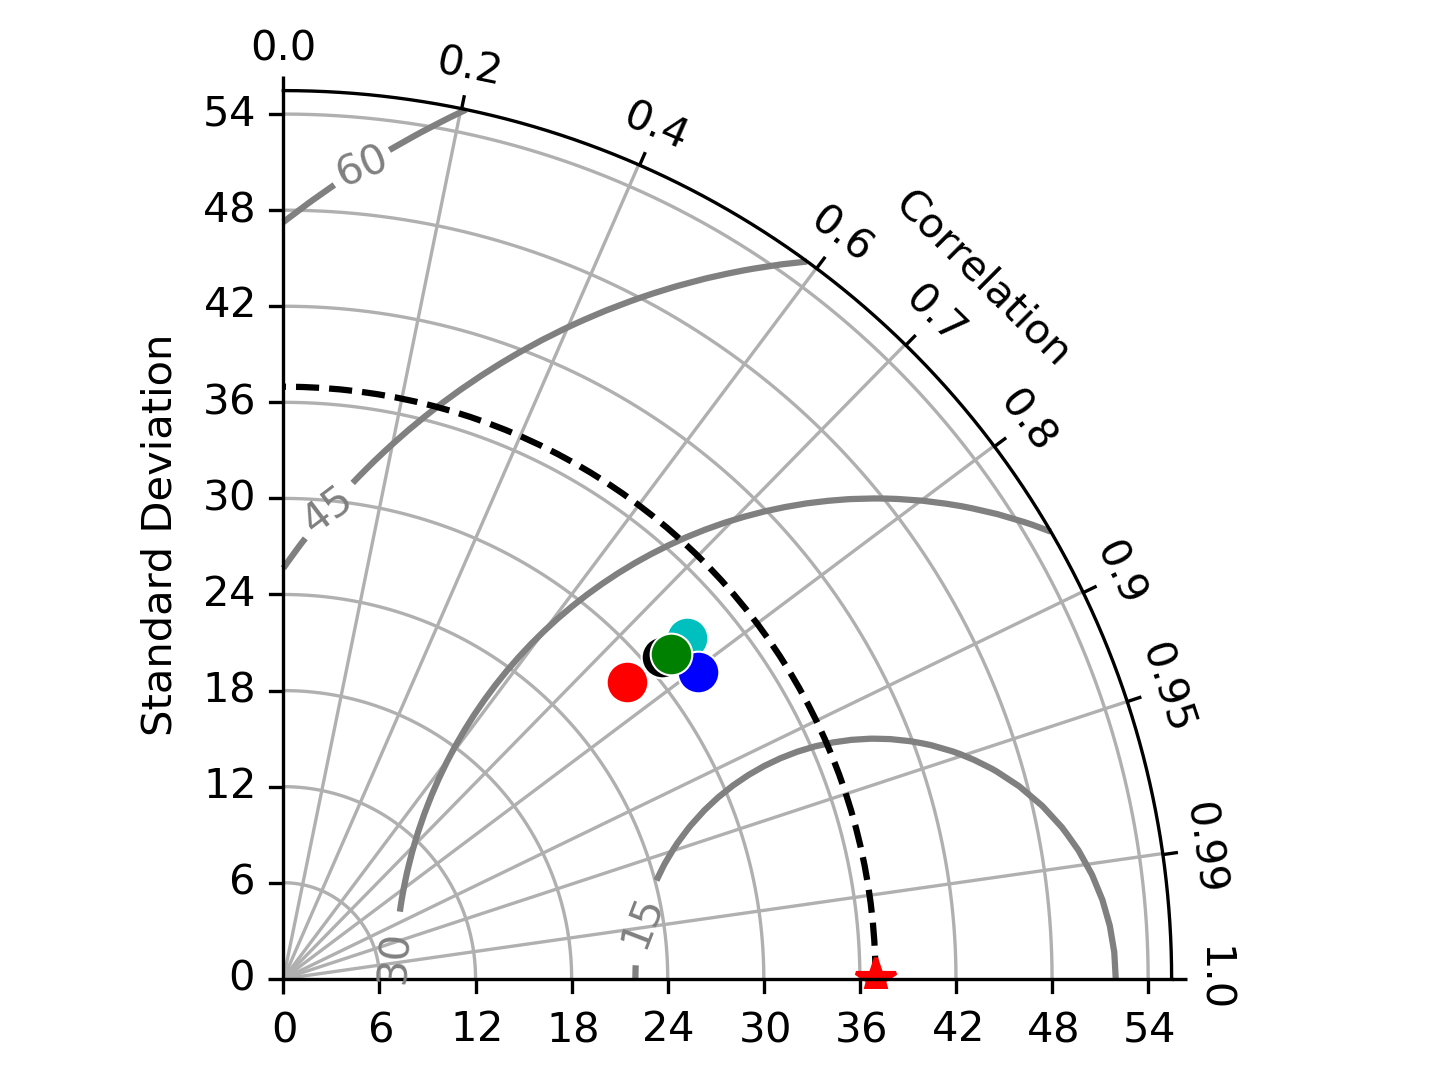

In [46]:
fig = plt.figure()

dia = TaylorDiagram(stdref, fig=fig, label='Reference', extend=False)
dia.samplePoints[0].set_color('r')  # Mark reference point as a red star

# Remove bottom label
dia._ax.axis["left"].label.set_text("")

# Add label to left
dia._ax.axis["right"].toggle(label=True)
dia._ax.axis["right"].label.set_text("Standard Deviation")

# Add models to Taylor diagram
for i, (stddev, corrcoef, name, col, marker) in enumerate(samples):
    dia.add_sample(stddev, corrcoef,
                   marker=marker, ms=10, ls='',
                   mfc=col, mec='white', mew=0.5,
                   label=name)

# Add RMS contours, and label them
contours = dia.add_contours(levels=5, colors='0.5')  # 5 levels in grey
plt.clabel(contours, inline=1, fontsize=10, fmt='%.0f')

dia.add_grid()                                  # Add grid
dia._ax.axis[:].major_ticks.set_tick_out(True)  # Put ticks outward

plt.savefig(f'{dir_figs}/taylor_diagram_ldeo_2010_latest.pdf', 
                transparent = True, 
                bbox_inches = 'tight', 
                pad_inches = 0)

## BIAS

In [37]:
#1990s
for prod in df.columns:
    print(prod)
    print(df[prod].mean()-df['OBS'].mean())

somffn
-1.531487263208703
carbo
-4.113602295861028
lsce
-1.8418630286108169
csir
-2.6532237261678233
hpd
-2.788897603103237
OBS
0.0


In [42]:
#2000s
for prod in df.columns:
    print(prod)
    print(df[prod].mean()-df['OBS'].mean())

somffn
-2.275527812738744
carbo
-1.7369384920312427
lsce
-1.527594043282022
csir
-2.757012833857914
hpd
-1.4955461345145409
OBS
0.0


In [47]:
#2010s
for prod in df.columns:
    print(prod)
    print(df[prod].mean()-df['OBS'].mean())

somffn
-0.03133668674115597
carbo
1.4780996583842239
lsce
0.6383295468208985
csir
0.1722499445264134
hpd
0.6243690241317381
OBS
0.0


## RMSE

In [38]:
# 1990s
def rmse(prod):
    return np.sqrt(((df[prod]-df['OBS'])**2).mean())

for prod in df.columns:
    print(prod)
    print(rmse(prod))

somffn
26.03152026951079
carbo
28.105720247567216
lsce
25.380257104289118
csir
25.461486998196325
hpd
25.06681836704288
OBS
0.0


In [43]:
# 2000s
def rmse(prod):
    return np.sqrt(((df[prod]-df['OBS'])**2).mean())

for prod in df.columns:
    print(prod)
    print(rmse(prod))

somffn
18.12009826214058
carbo
18.112072486155235
lsce
16.964399029763193
csir
17.259227466631444
hpd
17.179794176682368
OBS
0.0


In [48]:
# 2010s
def rmse(prod):
    return np.sqrt(((df[prod]-df['OBS'])**2).mean())

for prod in df.columns:
    print(prod)
    print(rmse(prod))

somffn
24.106342894186692
carbo
24.359799131621948
lsce
23.967151877838955
csir
24.144389442384618
hpd
22.145353797095275
OBS
0.0


## AAE

In [39]:
# 1990
def aae(prod):
    return np.abs(df[prod]-df['OBS']).mean()

for prod in df.columns:
    print(prod)
    print(aae(prod))

somffn
15.613412082712696
carbo
17.057771851919814
lsce
15.432984229708742
csir
15.519136531502197
hpd
14.729891993932682
OBS
0.0


In [44]:
# 2000s
def aae(prod):
    return np.abs(df[prod]-df['OBS']).mean()

for prod in df.columns:
    print(prod)
    print(aae(prod))

somffn
12.178922536384995
carbo
12.31810609660854
lsce
11.598422761411639
csir
11.850141568048533
hpd
11.452329728642933
OBS
0.0


In [49]:
# 2010s
def aae(prod):
    return np.abs(df[prod]-df['OBS']).mean()

for prod in df.columns:
    print(prod)
    print(aae(prod))

somffn
15.920738275714294
carbo
15.553678247070572
lsce
15.831941428239901
csir
16.06565719599354
hpd
14.158201074947558
OBS
0.0


# OLD

In [226]:
for prod in df.columns:
    print(prod)
    print(df[prod].mean()-df['OBS'].mean())

somffn
-1.5157500441889624
carbo
-4.107002100110037
lsce
-1.8102505227294614
csir
-2.6397201717552434
hpd
-2.901779858346174
OBS
0.0


In [227]:
def aae(prod):
    return np.abs(df[prod]-df['OBS']).mean()

for prod in df.columns:
    print(prod)
    print(aae(prod))

somffn
15.624293482205257
carbo
17.064398097440357
lsce
15.442782548922748
csir
15.524113065462387
hpd
15.138731938419397
OBS
0.0


In [1]:
#plt.plot([100,500],[100,500])
#for prod in ['somffn','carbo','lsce','csir']:
#    plt.scatter(df['OBS'],df[prod])

#plt.scatter(df['OBS'],df['hpd'],c='b')

# HOT time series

In [229]:
# time series 
dir_data = '/local/data/artemis/workspace/gloege'

# BATS
ds_bats = xr.open_dataset(f'{dir_data}/data/BATS/BATS.nc')

# HOT
ds_hot = xr.open_dataset(f'{dir_data}/data/HOT/HOT.nc')
ds_hot = ds_hot.where(ds_hot['spco2']>0)

# locations
BATS={'lat':31.83,
      'lon':360-(64.17)}

HOTS={'lat':22.75,
      'lon':360-158}

ds_hot_mon = ds_hot.resample(time='1M').mean()


ds_hot_mon = ds_hot_mon.assign_coords(lon=(202.5),
                                      lat=(22.5)).expand_dims(['lat','lon'])
ds_hot_mon = ds_hot_mon.transpose('time','lat','lon')

### ================================================
### force time vector to be proper format and range
### ================================================
dates = pd.date_range(start='1988-10-01T00:00:00.000000000', 
                      end='2017-12-01T00:00:00.000000000',
                      freq='MS')+ np.timedelta64(14, 'D')
da_dates = xr.DataArray(dates, dims='time')
ds_hot_mon['time'] = dates
ds_hot_mon = ds_hot_mon.squeeze()

/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [230]:
ds_prod_hot = ds_prod.sel(
    lat=HOTS['lat'], 
    lon=HOTS['lon'], 
    method='nearest')

ds_hpd_hot = ds_hpd.sel(
    lat=HOTS['lat'], 
    lon=HOTS['lon'], 
    method='nearest')

In [236]:
dates = ['1990-01-01', '1999-12-31']
ds_prod_hot_tmp = ds_prod_hot.sel(time=slice(dates[0], dates[1]))
ds_hot_mon_tmp = ds_hot_mon.sel(time=slice(dates[0], dates[1]))
ds_hpd_hot_tmp = ds_hpd_hot.sel(time=slice(dates[0], dates[1]))

In [237]:
(data_somffn, data_carbo, data_lsce, data_csir, data_hpd, data_obs) = xr.align(
    ds_prod_hot_tmp['mpisomffn'],
    ds_prod_hot_tmp['jenamls'],
    ds_prod_hot_tmp['lsceffnn2'],
    ds_prod_hot_tmp['csirml6'],
    ds_hpd_hot_tmp['spco2_AVG'],
    ds_hot_mon_tmp['spco2'].load(),)

data = {'somffn': list(data_somffn.values.flatten()), 
        'carbo': list(data_carbo.values.flatten()), 
        'lsce': list(data_lsce.values.flatten()), 
        'csir': list(data_csir.values.flatten()), 
        'hpd': list(data_hpd.values.flatten()), 
        'OBS': list(data_obs.values.flatten())}

## Dataframe
df = pd.DataFrame(data)
df = df.dropna()

obs='OBS'
stats_somffn = sm.taylor_statistics(df['somffn'].values,df[obs].values,'data')
stats_lsce = sm.taylor_statistics(df['lsce'].values,df[obs].values,'data')
stats_carbo = sm.taylor_statistics(df['carbo'].values,df[obs].values,'data') # was added
stats_csir = sm.taylor_statistics(df['csir'].values,df[obs].values,'data') # was added
stats_hpd = sm.taylor_statistics(df['hpd'].values,df[obs].values,'data') # was added

# Reference std
stdref = stats_somffn['sdev'][0]

# Samples std,rho,name
samples = [
    [stats_somffn['sdev'][1], stats_somffn['ccoef'][1], "SOM-FFN",'k','o'],
    [stats_lsce['sdev'][1], stats_lsce['ccoef'][1], "FFNN-LSCE",'g','o'],
    [stats_carbo['sdev'][1], stats_carbo['ccoef'][1], "JenaMLS",'c','o'],
    [stats_csir['sdev'][1], stats_csir['ccoef'][1], "CSIRML6",'r','o'],
    [stats_hpd['sdev'][1], stats_hpd['ccoef'][1], "GLODAP",'b','o'],]


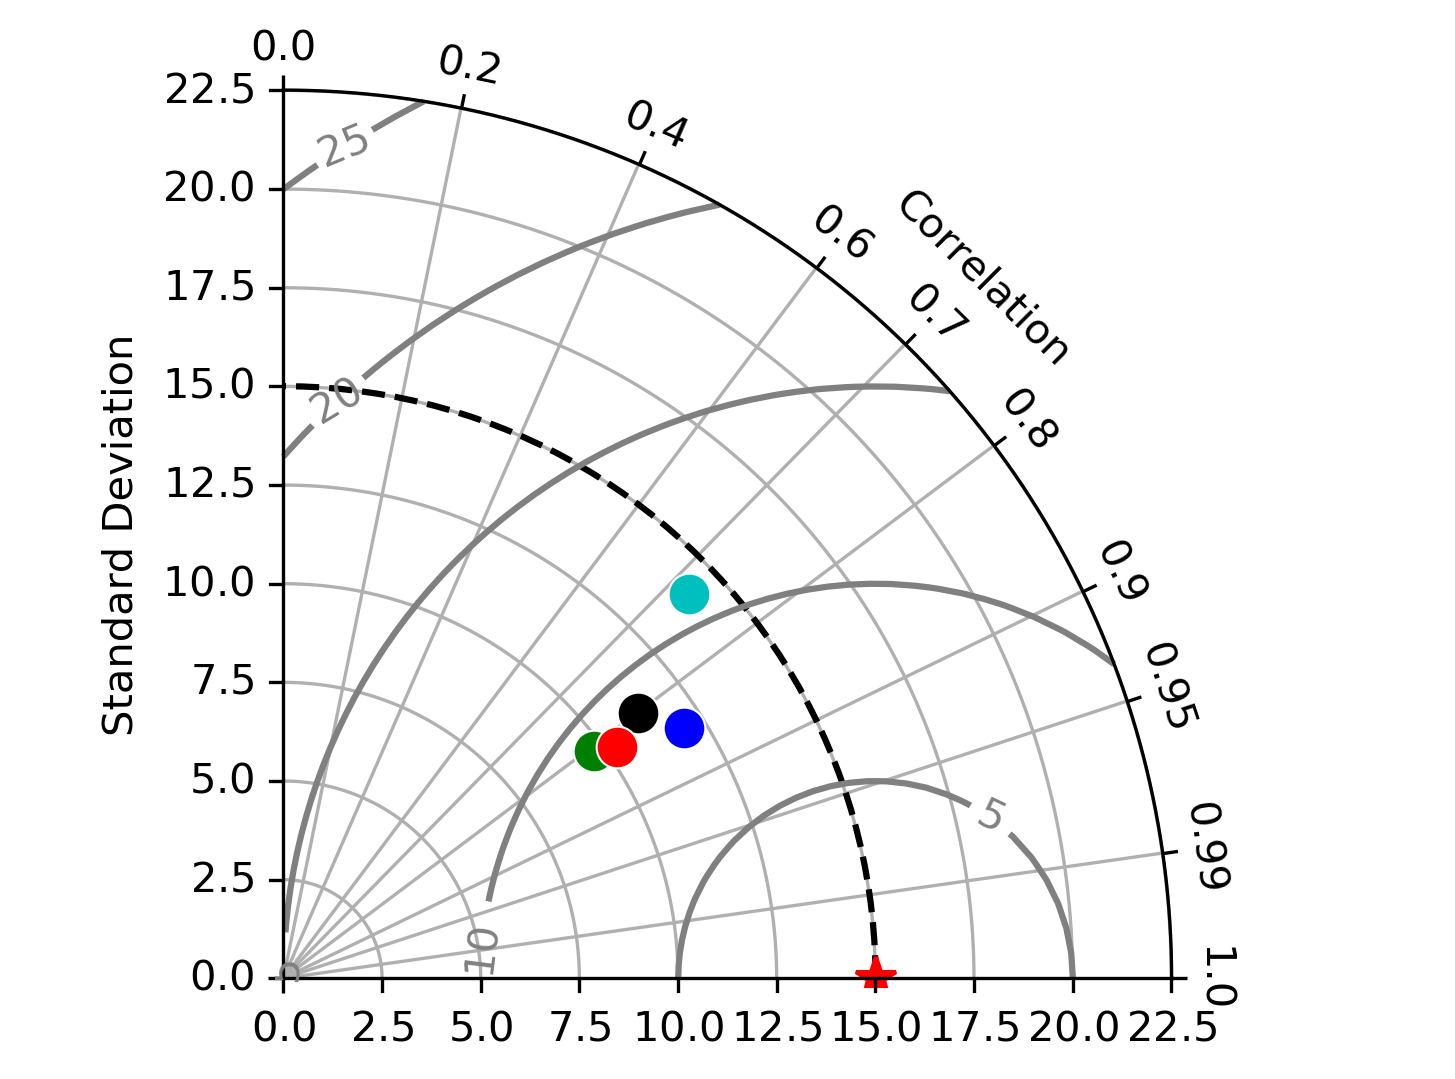

In [238]:

fig = plt.figure()

dia = TaylorDiagram(stdref, fig=fig, label='Reference', extend=False)
dia.samplePoints[0].set_color('r')  # Mark reference point as a red star

# Remove bottom label
dia._ax.axis["left"].label.set_text("")

# Add label to left
dia._ax.axis["right"].toggle(label=True)
dia._ax.axis["right"].label.set_text("Standard Deviation")

# Add models to Taylor diagram
for i, (stddev, corrcoef, name, col, marker) in enumerate(samples):
    dia.add_sample(stddev, corrcoef,
                   marker=marker, ms=10, ls='',
                   mfc=col, mec='white', mew=0.5,
                   label=name)

# Add RMS contours, and label them
contours = dia.add_contours(levels=5, colors='0.5')  # 5 levels in grey
plt.clabel(contours, inline=1, fontsize=10, fmt='%.0f')

dia.add_grid()                                  # Add grid
dia._ax.axis[:].major_ticks.set_tick_out(True)  # Put ticks outward


#plt.savefig(f'{dir_figs}/target_diagram_hot.pdf', 
#                transparent = True, 
#                bbox_inches = 'tight', 
#                pad_inches = 0)

In [239]:
for prod in df.columns:
    print(prod)
    print(df[prod].mean()-df['OBS'].mean())

somffn
2.816498059724438
carbo
-0.5623237047697671
lsce
2.7414868164062227
csir
3.29589138901315
hpd
2.3591847832681196
OBS
0.0


In [240]:
def rmse(prod):
    return np.sqrt(((df[prod]-df['OBS'])**2).mean())

for prod in df.columns:
    print(prod)
    print(rmse(prod))

somffn
9.45006323732411
carbo
10.83970880021278
lsce
9.565664925148814
csir
9.381415096639294
hpd
8.323301540322655
OBS
0.0


## BATS

In [18]:
ds_bats_mon = ds_bats.resample(time='1M').mean()


ds_bats_mon = ds_bats_mon.assign_coords(lon=(295.5),
                                       lat=(31.5)).expand_dims(['lat','lon'])
ds_bats_mon = ds_bats_mon.transpose('time','lat','lon')


### ================================================
### force time vector to be proper format and range
### ================================================
dates = pd.date_range(start='1983-09-01T00:00:00.000000000', 
                      end='2018-08-01T00:00:00.000000000',
                      freq='MS')+ np.timedelta64(14, 'D')
da_dates = xr.DataArray(dates, dims='time')
ds_bats_mon['time'] = dates
ds_bats_mon = ds_bats_mon.squeeze()


NameError: name 'ds_bats' is not defined

In [74]:
ds_prod_bats = ds_prod.sel(
    lat=BATS['lat'], 
    lon=BATS['lon'], 
    method='nearest')

ds_hpd_bats = ds_hpd.sel(
    lat=BATS['lat'], 
    lon=BATS['lon'], 
    method='nearest')

In [75]:
dates = ['2010-01-01', '2018-12-31']
ds_prod_bats_tmp = ds_prod_bats.sel(time=slice(dates[0], dates[1]))
ds_bats_mon_tmp = ds_bats_mon.sel(time=slice(dates[0], dates[1]))
ds_hpd_bats_tmp = ds_hpd_bats.sel(time=slice(dates[0], dates[1]))

In [76]:
(data_somffn, data_carbo, data_lsce, data_csir, data_hpd, data_obs) = xr.align(
    ds_prod_bats_tmp['mpisomffn'],
    ds_prod_bats_tmp['jenamls'],
    ds_prod_bats_tmp['lsceffnn2'],
    ds_prod_bats_tmp['csirml6'],
    ds_hpd_bats_tmp['spco2_AVG'],
    ds_bats_mon_tmp['spco2'].load(),)

data = {'somffn': list(data_somffn.values.flatten()), 
        'carbo': list(data_carbo.values.flatten()), 
        'lsce': list(data_lsce.values.flatten()), 
        'csir': list(data_csir.values.flatten()), 
        'hpd': list(data_hpd.values.flatten()), 
        'OBS': list(data_obs.values.flatten())}

## Dataframe
df = pd.DataFrame(data)
df = df.dropna()

obs='OBS'
stats_somffn = sm.taylor_statistics(df['somffn'].values,df[obs].values,'data')
stats_lsce = sm.taylor_statistics(df['lsce'].values,df[obs].values,'data')
stats_carbo = sm.taylor_statistics(df['carbo'].values,df[obs].values,'data') # was added
stats_csir = sm.taylor_statistics(df['csir'].values,df[obs].values,'data') # was added
stats_hpd = sm.taylor_statistics(df['hpd'].values,df[obs].values,'data') # was added

# Reference std
stdref = stats_somffn['sdev'][0]

# Samples std,rho,name
samples = [
    [stats_somffn['sdev'][1], stats_somffn['ccoef'][1], "SOM-FFN",'k','o'],
    [stats_lsce['sdev'][1], stats_lsce['ccoef'][1], "FFNN-LSCE",'g','o'],
    [stats_carbo['sdev'][1], stats_carbo['ccoef'][1], "JenaMLS",'c','o'],
    [stats_csir['sdev'][1], stats_csir['ccoef'][1], "CSIRML6",'r','o'],
    [stats_hpd['sdev'][1], stats_hpd['ccoef'][1], "GLODAP",'b','o'],]


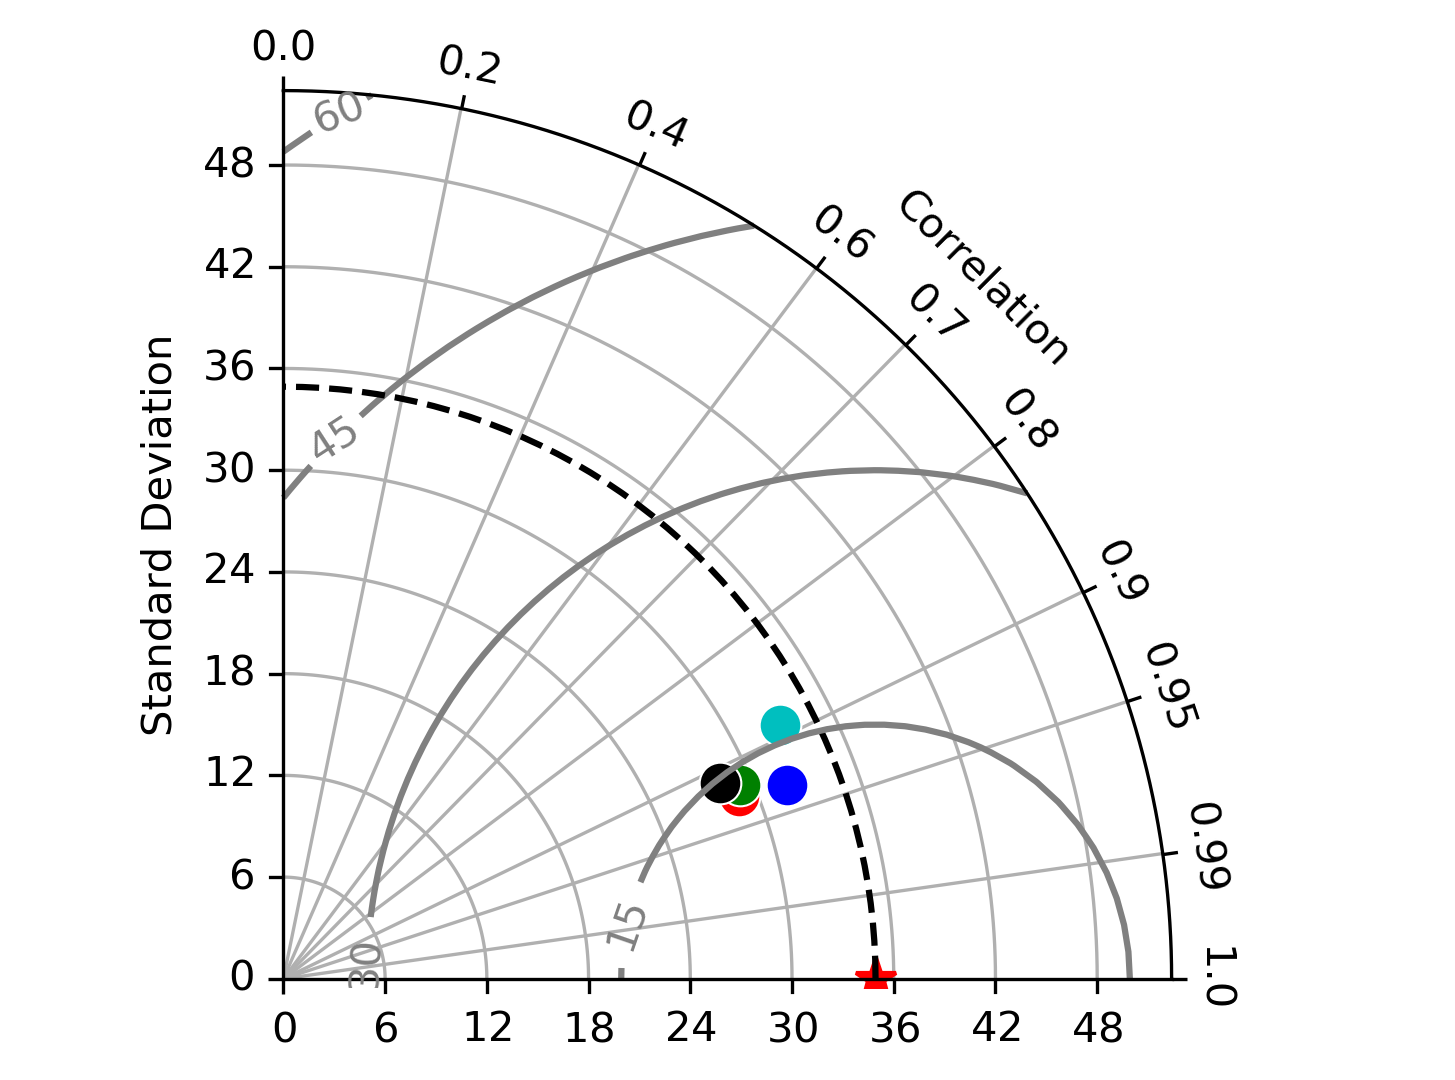

In [77]:

fig = plt.figure()

dia = TaylorDiagram(stdref, fig=fig, label='Reference', extend=False)
dia.samplePoints[0].set_color('r')  # Mark reference point as a red star

# Remove bottom label
dia._ax.axis["left"].label.set_text("")

# Add label to left
dia._ax.axis["right"].toggle(label=True)
dia._ax.axis["right"].label.set_text("Standard Deviation")

# Add models to Taylor diagram
for i, (stddev, corrcoef, name, col, marker) in enumerate(samples):
    dia.add_sample(stddev, corrcoef,
                   marker=marker, ms=10, ls='',
                   mfc=col, mec='white', mew=0.5,
                   label=name)

# Add RMS contours, and label them
contours = dia.add_contours(levels=5, colors='0.5')  # 5 levels in grey
plt.clabel(contours, inline=1, fontsize=10, fmt='%.0f')

dia.add_grid()                                  # Add grid
dia._ax.axis[:].major_ticks.set_tick_out(True)  # Put ticks outward


plt.savefig(f'{dir_figs}/target_diagram_bats.pdf', 
                transparent = True, 
                bbox_inches = 'tight', 
                pad_inches = 0)

In [79]:
for prod in df.columns:
    print(prod)
    print(df[prod].mean()-df['OBS'].mean())

somffn
-0.05030835348452456
carbo
6.524830283513211
lsce
-1.473184136284658
csir
2.553840962551419
hpd
4.517637837951611
OBS
0.0


In [80]:
def rmse(prod):
    return np.sqrt(((df[prod]-df['OBS'])**2).mean())

for prod in df.columns:
    print(prod)
    print(rmse(prod))

somffn
14.732252801013981
carbo
17.2706665925486
lsce
14.007056330638028
csir
13.68650409106219
hpd
13.319724934542966
OBS
0.0


# OLD

In [ ]:
#HPD PRODUCT
dir_reccap='/local/data/artemis/workspace/gloege/RECCAP2'
#ds_hpd = xr.open_dataset(f'{dir_reccap}/LDEO-HPD-average_v2021a_1x1_198201-201812.nc')
ds_hpd = xr.open_dataset(f'{dir_reccap}/LDEO-HPD_mon_1x1_198201-201812_v20200324.nc').mean('model')


#-----------------------------------------------------------------------------------------
# load pco2 data
#-----------------------------------------------------------------------------------------
data_dir = '/home/gloege/projects/ldeo_hpd/data/model_output/XGB/GCB_2020_plus_xco2'
ds_spco2 = xr.merge([xr.open_dataset(fl) for fl in glob.glob(f'{data_dir}/XGB*.nc')])
ds_spco2 = ds_spco2.sel(time=slice("1985","2018"))

# GCB 2020
variables = [ 'corrected_cesm_spco2_1x1_A', 
    'corrected_csiro_spco2_1x1_A',
    'corrected_fesom_spco2_1x1_A',
    'corrected_mpi_spco2_1x1_A', 
    'corrected_cnrm_spco2_1x1_A',
    'corrected_ipsl_spco2_1x1_A',
    'corrected_planktom_spco2_1x1_A',
    'corrected_noresm_spco2_1x1_A',
    'corrected_princeton_spco2_1x1_A',]
            
        
# make dummy variable of zeros
ds_spco2['spco2'] = ds_spco2['corrected_cesm_spco2_1x1_A']*0

# add all predictions together
for var in variables:
    ds_spco2['spco2'] += ds_spco2[f'{var}']
    
# divide by number vars to average
ds_spco2['spco2'] = ds_spco2['spco2'] / len(variables)

In [ ]:
%%time

# 1) load pco2 data
data_dir = '/home/gloege/projects/ldeo_hpd/data/model_output/XGB'
ds_hpd = xr.merge([xr.open_dataset(fl) for fl in glob.glob(f'{data_dir}/XGB*.nc')])

# 1.1) the different models we corrected
variables = [ 'corrected_cesm_spco2_1x1_A',
    'corrected_recom_jra_spco2_1x1_A', 
    'corrected_mpi_spco2_1x1_A', 
    'corrected_cnrm_spco2_1x1_A',
    'corrected_noresm_spco2_1x1_A',
    'corrected_planktom_spco2_1x1_A',
    'corrected_princeton_spco2_1x1_A',
    'corrected_csiro_spco2_1x1_A',
    'corrected_ipsl_spco2_1x1_A']

# 1.2) make dummy variable of zeros
ds_hpd['spco2'] = ds_hpd['corrected_cesm_spco2_1x1_A']*0

# 1.3) add all predictions together
for var in variables:
    ds_hpd['spco2'] += ds_hpd[f'{var}']
    
# 1.4) divide by number vars to average
ds_hpd['spco2_AVG'] = ds_hpd['spco2'] / len(variables)

In [ ]:
#plt.plot([100,500],[100,500])
#for prod in ['somffn','carbo','lsce','csir']:
#    plt.scatter(df['OBS'],df[prod])

#plt.scatter(df['OBS'],df['hpd'],c='b')

In [ ]:
def aae(prod):
    return np.abs(df[prod]-df['OBS']).mean()

for prod in df.columns:
    print(prod)
    print(aae(prod))
    
    #2010s
for prod in df.columns:
    print(prod)
    print(df[prod].mean()-df['OBS'].mean())
    
def rmse(prod):
    return np.sqrt(((df[prod]-df['OBS'])**2).mean())

for prod in df.columns:
    print(prod)
    print(rmse(prod))